In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import GridSearchCV

## Random Forrest Modelling

### Initial Model

In [18]:
train_test_data = pd.read_csv('../../../../data/train_test_data/train_test_data_with_rolling.csv')

In [19]:
train_test_data.dropna(inplace=True)
train_test_data

,timestamp,rank,ticker,name,mentions,mentioning_users,upvotes,sentiment,rank_24h_ago,mentions_24h_ago,...,dividend_exists,rank_percentage_change_24h,mentions_percentage_change_24h,opening_price,closing_price,label,mentions_rolling_avg,upvotes_rolling_avg,mentioning_users_rolling_avg,sentiment_rolling_avg
0,2023-05-25,9,AAPL,Apple,90,71.0,441,58.0,8,45,...,1,0.125000,1.000000,172.41,172.99,1,90.0,441.000000,71.000000,58.0
1,2023-05-29,10,AAPL,Apple,23,23.0,94,77.0,9,36,...,1,0.111111,-0.361111,173.32,175.43,1,23.0,94.000000,23.000000,77.0
2,2023-05-30,9,AAPL,Apple,40,37.0,649,38.0,11,22,...,1,-0.181818,0.818182,176.96,177.30,1,31.5,371.500000,30.000000,57.5
3,2023-06-01,8,AAPL,Apple,115,88.0,306,49.0,12,50,...,1,-0.333333,1.300000,177.70,180.09,1,77.5,477.500000,62.500000,43.5
4,2023-06-02,5,AAPL,Apple,176,126.0,604,57.0,8,122,...,1,-0.375000,0.442623,181.03,180.95,0,145.5,455.000000,107.000000,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-06-19,4,TSLA,Tesla,48,43.0,520,68.0,3,66,...,0,0.333333,-0.272727,258.92,260.54,1,48.0,491.000000,44.000000,59.5
196,2023-06-20,3,TSLA,Tesla,72,54.0,303,64.0,4,48,...,0,-0.250000,0.500000,261.50,274.45,1,56.0,428.333333,47.333333,61.0
197,2023-05-29,12,TSM,TSMC,20,19.0,81,100.0,24,13,...,1,-0.500000,0.538462,100.85,103.21,1,20.0,81.000000,19.000000,100.0
198,2023-05-26,10,ULTA,ULTA Beauty,60,42.0,181,66.0,183,6,...,0,-0.945355,9.000000,436.11,420.27,0,60.0,181.000000,42.000000,66.0


In [20]:
# Remove columns that are not needed for modelling

train_test_data = train_test_data.drop(
    ['name', 
     'ticker', 
     'timestamp',
    'opening_price',
   'closing_price',
   'rank_24h_ago',
   'mentions_24h_ago',
   'rank', 'dividend_exists'
    ], axis=1).sort_values(
    by=['mentions'], 
    ascending=False)

In [21]:
train_test_data

,mentions,mentioning_users,upvotes,sentiment,beta,earnings_per_share_ttm,price_to_equity_ttm,return_on_equity_ttm,dividend_yield_annual,total_debt_to_equity_quarterly,revenue_growth_ttm_yoy,rank_percentage_change_24h,mentions_percentage_change_24h,label,mentions_rolling_avg,upvotes_rolling_avg,mentioning_users_rolling_avg,sentiment_rolling_avg
124,3216,1370.0,30860,57.0,1.770654,1.7415,173.5333,18.66000,0.052394,0.4956,0.22,-0.666667,10.694545,0,3216.000000,30860.0,1370.000000,57.000000
26,1684,1076.0,10793,68.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,0.000000,1.284939,0,961.666667,6439.0,656.666667,71.333333
27,1401,856.0,8556,59.0,2.890432,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,0.000000,-0.170515,1,1292.666667,8046.0,834.333333,65.666667
22,1363,889.0,8328,68.0,2.707838,-2.4261,0.0000,-22.98162,0.000000,0.0000,14.60,1.000000,3.168196,0,1363.000000,8328.0,889.000000,68.000000
125,1268,738.0,24699,61.0,1.770654,1.7415,214.7679,18.66000,0.042127,0.4956,0.22,0.000000,-0.584262,1,2242.000000,27779.5,1054.000000,59.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,21,21.0,71,27.0,1.572032,3.0917,6.2354,67.06000,2.949852,2.9535,-1.62,-0.142857,0.615385,0,21.000000,71.0,21.000000,27.000000
113,20,21.0,317,71.0,1.137865,9.2258,37.5006,38.46000,0.781385,0.3322,7.81,-0.388889,0.250000,0,73.000000,465.0,51.500000,72.000000
197,20,19.0,81,100.0,1.590526,39.3679,14.3787,36.27000,1.987601,0.2909,32.95,-0.500000,0.538462,1,20.000000,81.0,19.000000,100.000000
77,19,20.0,22,67.0,1.225190,2.2551,41.2108,4.32000,0.000000,0.4958,13.52,-0.076923,0.117647,0,19.000000,22.0,20.000000,67.000000


In [22]:
train_test_data.value_counts('label')

label
1    104
0     92
Name: count, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(train_test_data.drop('label', axis=1), train_test_data['label'], test_size=0.2, random_state=42)

In [24]:
clf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=0)

In [25]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=6, random_state=0)

In [26]:
clf.score(x_test, y_test)

0.525

In [27]:
clf.score(x_train, y_train)

0.9935897435897436

### Hyper-parameter tuning

In [28]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [6, 8, 10, 12],
#     'max_features': [2, 3],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300, 1000]
# }

# rf = RandomForestClassifier()
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(x_train, y_train)
# grid_search.best_params_
# clf = grid_search.best_estimator_


In [29]:
# grid_search.best_params_

In [30]:
# grid_search.best_score_

In [31]:
# grid_search.score(x_test, y_test)

In [32]:
# random search cv

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=1000, num=10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf = RandomForestClassifier()
random_search = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                                   n_iter=100, cv=3, verbose=2, random_state=42,
                                   n_jobs=-1)
random_search.fit(x_train, y_train)
random_search.best_params_
clf = random_search.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [33]:
random_search.best_params_

{'n_estimators': 780,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [34]:
random_search.best_score_

0.5384615384615384

In [35]:
clf.score(x_test, y_test)

0.575

In [36]:
len(x_test)

40

### Visuallizing feature importance

In [37]:
feature_importances = pd.DataFrame(clf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance', ascending=False)

In [38]:
feature_importances

,importance
rank_percentage_change_24h,0.102727
mentioning_users,0.084188
mentions_percentage_change_24h,0.081710
upvotes,0.081489
mentions_rolling_avg,0.073724
mentions,0.069477
mentioning_users_rolling_avg,0.065427
sentiment,0.058730
upvotes_rolling_avg,0.058577
revenue_growth_ttm_yoy,0.057965


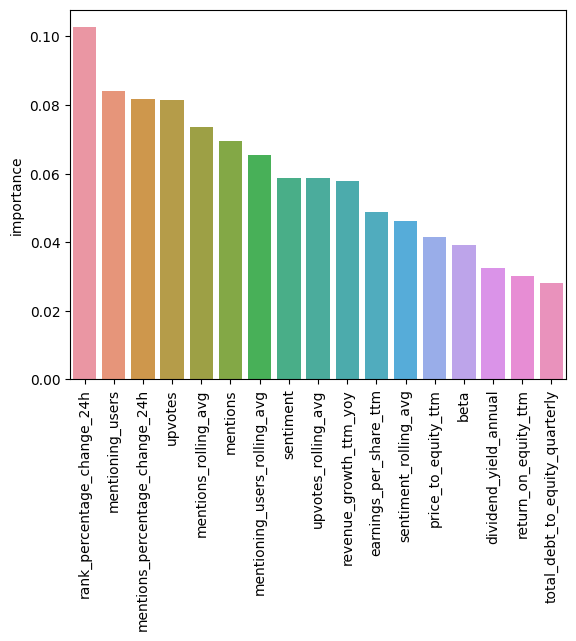

In [39]:
# visualize the most important features
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x=feature_importances.index, y=feature_importances['importance'])
plt.xticks(rotation=90)
plt.show()